LETS GROW MORE

Data Science Internship(LGM VIP-SEPT 2021)

TASK 2:Stock Price Prediction and Forecasting using Stacked LSTM

BEGINNER LEVEL TASK 2

By:ALEENA P SABU



PART1 DATA PREPROCESSING

**IMPORTING THE REQUIRED LIBRARIES**





In [19]:
# Data Preprocessing
import numpy as np #Using NumPy mathematical and logical operations on arrays can be performed
import matplotlib.pyplot as plt #used for creating a figure, creating a plotting area, plotting lines, adding plot labels, etc.
import pandas as pd # #bringing all of the pandas functionality to the python script 

**READING THE DATA FILE**

In [37]:
url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


**FEATURE SCALING**

In [21]:
from sklearn.preprocessing import MinMaxScaler #Transform features by scaling each feature to a given range
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

**CREATING A DATA STRUCTURE WITH 60 TIMESTEPS AND 1 OUTPUT**

In [22]:

X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

**RESHAPING**

In [23]:

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

PART 2 BUILDING THE RNN

**IMPORT KERAS LIBRARIES AND PACKAGES**

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

**INITIALIZE RNN**

In [25]:
regressor = Sequential()


**ADDING THE 4 LSTM LAYERS AND OUTPUT LAYER**

In [26]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


# Adding the output layer
regressor.add(Dense(units = 1))

**COMPILING RNN AND FITTING IT TO TRAINING SET**

In [30]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
62/62 [==============================] - 14s 116ms/step - loss: 0.0094
Epoch 2/100
62/62 [==============================] - 7s 115ms/step - loss: 0.0028
Epoch 3/100
62/62 [==============================] - 7s 116ms/step - loss: 0.0026
Epoch 4/100
62/62 [==============================] - 7s 116ms/step - loss: 0.0025
Epoch 5/100
62/62 [==============================] - 7s 116ms/step - loss: 0.0021
Epoch 6/100
62/62 [==============================] - 7s 115ms/step - loss: 0.0021
Epoch 7/100
62/62 [==============================] - 7s 115ms/step - loss: 0.0019
Epoch 8/100
62/62 [==============================] - 7s 116ms/step - loss: 0.0019
Epoch 9/100
62/62 [==============================] - 7s 116ms/step - loss: 0.0020
Epoch 10/100
62/62 [==============================] - 7s 114ms/step - loss: 0.0019
Epoch 11/100
62/62 [==============================] - 7s 116ms/step - loss: 0.0020
Epoch 12/100
62/62 [==============================] - 7s 117ms/step - loss: 0.0018
Epoch 13/100

PART 3 MAKING PREDICTIONS AND VISUALISING THE RESULTS

**GETTING  REAL STOCK PRICE**

In [32]:
url='https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values

**GETTING PREDICTED STOCK PRICE**

In [33]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

**VISUALISING THE RESULTS**

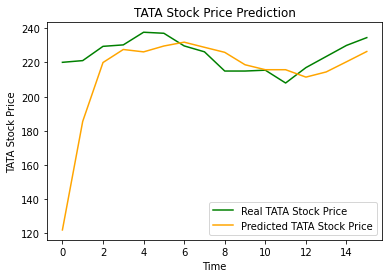

In [38]:
# Visualising the results
plt.plot(real_stock_price, color = 'green', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'orange', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

From this graph the distance between real values and predicted values can be compared.

Thank you for visiting.